# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**We performed our EDA using data from the Spotify API. The API featured "metadata in JSON format about artists, albums, and tracks directly from the Spotify catalogue".** 


The data used below for our EDA features 1585 playlists that we accessed using the Spotipy package, enabling us to pull data on Spotify's own curated playlists. We analyzed data on these playlists with all of their songs, as well as their artist name, whether they were explicit or not, duration, the artist's popularity (if there were multiple artists we only took the first artist) and number of followers, as well as the genres that the artist is classified under.

In [2]:
# Load in data
df = pd.read_csv('total_info.csv', encoding = 'latin-1')

In [3]:
# Clean Variables
del df['Unnamed: 0']
df['artist_popularity'] = pd.to_numeric(df['artist_popularity'], errors = 'coerce')
df['artist_followers'] = pd.to_numeric(df['artist_followers'], errors = 'coerce')

In [4]:
df.head()

,playlist_id,playlist_name,followers,song_name,number_of_artists,artist_name,artist_id,popularity,track_number,explicit,duration_ms,available_markets,delete,artist_popularity,artist_followers,artist_genres
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,18123888.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
1,37i9dQZF1DWXDAhqlN7e6W,This Is: Max Martin,15685.0,Hands To Myself,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,69,3,0,200680,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
2,37i9dQZF1DX7Q7o98uPeg1,Funkst,397098.0,Good For You - KASBO Remix,3,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,35,3,0,221560,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
3,37i9dQZF1DX3LyU0mhfqgP,Out Now,439685.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"
4,37i9dQZF1DX35oM5SPECmN,HIIT Workout,712771.0,Come & Get It,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,56,1,0,231733,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']"


We appended indicator variables to tell us whether a song in a playlist could be classified as a pop/rap/rock song, as well as if the song was written by a popular artist. We defined a “popular artist” as one ranked by Spotify as above 75 on an artist popularity scale of 1-100 (since this was the third quartile value). 

In [5]:
# Create genre indicator variable arrays
pop_ind = []
rap_ind = []
rock_ind = []
hip_hop_ind = []

for idx, row in enumerate(df['artist_genres'].values):
    if 'pop' in row:
        pop_ind.append(1)
        rap_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
    elif 'rap' in row:
        rap_ind.append(1)
        pop_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
    elif 'rock' in row:
        rock_ind.append(1)
        rap_ind.append(0)
        pop_ind.append(0)
        hip_hop_ind.append(0)
    elif 'hip' in row:
        rap_ind.append(0)
        pop_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(1)
    else:
        pop_ind.append(0)
        rap_ind.append(0)
        rock_ind.append(0)
        hip_hop_ind.append(0)
        
# Append array to dataframe
df['pop_ind'] = pop_ind
df['rap_ind'] = rap_ind
df['rock_ind'] = rock_ind
df['hip_hop_ind'] = hip_hop_ind

In [6]:
# Artist Popularity 75% is a 75, use for indicator 
df['popular_artist_ind'] = (df['artist_popularity'] >= 75)*1

In [7]:
# Sum Up the 100 tracks of info (or less) for each playlist
unique_plists = df['playlist_id'].unique()
columns = ['playlist','name','followers','num_songs','av_song_pop','pct_explicit','avg_dur','av_artist_followers', 'pop_pct', 'rap_pct', 'rock_pct', 'popular_artist_pct']
eda_frame = pd.DataFrame(index=range(0,len(unique_plists)), columns=columns)

for idx,plist in enumerate(unique_plists):
    eda_frame.loc[idx]['playlist'] = plist
    eda_frame.loc[idx]['name'] = df.loc[df['playlist_id'] == plist]['playlist_name']
    eda_frame.loc[idx]['followers'] = np.mean(df.loc[df['playlist_id'] == plist]['followers'])
    eda_frame.loc[idx]['num_songs'] = len(df.loc[df['playlist_id'] == plist])
    eda_frame.loc[idx]['av_song_pop'] = np.mean(df.loc[df['playlist_id'] == plist]['popularity'])
    eda_frame.loc[idx]['pct_explicit'] = np.mean(df.loc[df['playlist_id'] == plist]['explicit'])
    eda_frame.loc[idx]['avg_dur'] = np.mean(df.loc[df['playlist_id'] == plist]['duration_ms'])
    eda_frame.loc[idx]['av_artist_followers'] = np.mean(df.loc[df['playlist_id'] == plist]['artist_followers'])
    eda_frame.loc[idx]['pop_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['pop_ind'])
    eda_frame.loc[idx]['rap_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rap_ind'])
    eda_frame.loc[idx]['rock_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rock_ind'])
    eda_frame.loc[idx]['hip_hop_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['hip_hop_ind'])
    eda_frame.loc[idx]['avg_num_artists'] = np.mean(df.loc[df['playlist_id'] == plist]['number_of_artists'])
    eda_frame.loc[idx]['popular_artist_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['popular_artist_ind'])

We aggregated the data from individual songs into averages across entire playlists. These conglomerated metrics include the playlist’s ID, the playlist name, total followers, average artist followers, percent explicit, number of songs, percent of playlist that is a certain genre (pop, rap, rock, etc), percent popular artists, average song duration, average song popularity (scale of 1-100).

In [8]:
eda_frame.head()

,playlist,name,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct
0,37i9dQZF1DXcBWIGoYBM5M,0 Today's Top Hits 47 Today's Top H...,1.81239e+07,50,82.38,0.34,208121,2.75535e+06,0.8,0.06,0,1
1,37i9dQZF1DWXDAhqlN7e6W,1 This Is: Max Martin 125 This Is:...,15685,44,55.5227,0.113636,220925,3.99045e+06,0.977273,0,0.0227273,0.75
2,37i9dQZF1DX7Q7o98uPeg1,2 Funkst 2500 Funkst 2569 Funks...,397098,100,32.87,0.09,241358,319005,0.12,0.42,0.02,0.08
3,37i9dQZF1DX3LyU0mhfqgP,3 Out Now 48 Out Now 267 Out...,439685,55,71.7273,0.181818,207392,1.02241e+06,0.654545,0,0,0.6
4,37i9dQZF1DX35oM5SPECmN,4 HIIT Workout 129 HIIT Workout 48...,712771,50,59.06,0.12,223608,3.32207e+06,0.9,0,0.04,0.62


In [9]:
eda_frame['log_followers'] = np.log(eda_frame['followers'].astype(float))
eda_frame['log_artist_follow'] = np.log(eda_frame['av_artist_followers'].astype(float))
eda_frame = eda_frame.dropna(0)
eda_frame = eda_frame.replace([np.inf, -np.inf], 0)

In [10]:
# Summarizing our quantitative data
eda_frame.drop(['playlist', 'name'], axis = 1).describe()

,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct,log_followers,log_artist_follow
count,1.584000e+03,1584.000000,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,2.142093e+05,52.605429,38.331537,0.088401,2.657999e+05,9.070557e+05,0.438389,0.028073,0.146948,0.278765,9.574142,12.456636
std,6.863399e+05,25.069536,15.897419,0.185671,1.679411e+05,1.368342e+06,0.358942,0.094440,0.242333,0.316079,3.254485,2.118953
min,0.000000e+00,5.000000,0.000000,0.000000,3.962875e+04,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225
25%,1.746250e+03,32.000000,27.724700,0.000000,2.146209e+05,9.689143e+04,0.040000,0.000000,0.000000,0.010000,7.465226,11.481337
50%,3.029700e+04,50.000000,39.426216,0.010000,2.327892e+05,3.867883e+05,0.453229,0.000000,0.033333,0.150000,10.318803,12.865618
75%,1.628768e+05,66.000000,49.196341,0.084105,2.581028e+05,1.116790e+06,0.763927,0.000000,0.180000,0.460000,12.000749,13.925968
max,1.812389e+07,100.000000,82.380000,1.000000,2.507284e+06,1.424941e+07,1.000000,1.000000,1.000000,1.000000,16.712741,16.472226


## Exploring the distribution of followers

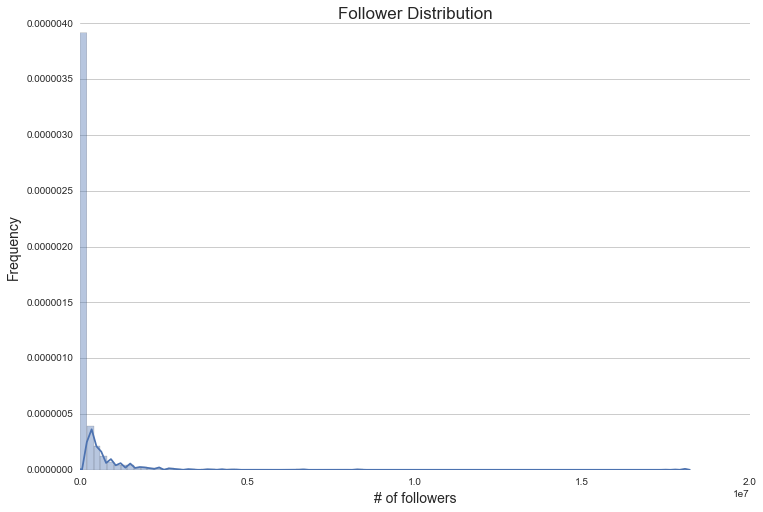

In [11]:
plt.figure(figsize = (12,8))
sns.distplot(eda_frame['followers'], bins = 90);
plt.title('Follower Distribution', size = 17)
plt.xlabel("# of followers", size = 14);
plt.ylabel("Frequency", size = 14)
sns.despine(bottom=True, left=True)
plt.xlim(0,2*10**7)
plt.grid(axis = 'x', color ='white', linestyle='-')
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);

It's apparent here that the response variable (number of followers) is extremely right skewed. Some playlists, such as "Today's Top Hits", were upper outliers that were magnitudes greater in number of follweres than other popular playlists. We address this skewness by log-transforming the number of followers. As seen below, taking the log of our response makes its distribution roughly normal. In addition, it allows us to work on a much easier scale than the untransformed response variable.

In [12]:
eda_frame.sort_values(by= 'followers', ascending = False)

,playlist,name,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct,log_followers,log_artist_follow
0,37i9dQZF1DXcBWIGoYBM5M,0 Today's Top Hits 47 Today's Top H...,18123888.0,50,82.380000,0.340000,2.081208e+05,2.755345e+06,0.800000,0.060000,0.000000,1.000000,16.712741,14.829053
48,37i9dQZF1DX0XUsuxWHRQd,67 RapCaviar 411 RapCaviar 468 Ra...,8318573.0,51,75.568627,0.980392,2.119144e+05,1.561226e+06,0.529412,0.294118,0.000000,0.862745,15.934001,14.260982
66,37i9dQZF1DX10zKzsJ2jva,105 ÌâåÁViva Latino! 702 ÌâåÁViva Lati...,6634680.0,50,79.660000,0.000000,2.172563e+05,1.790468e+06,0.500000,0.100000,0.020000,0.940000,15.707821,14.397987
218,37i9dQZF1DX4dyzvuaRJ0n,772 mint 938 mint 939 mint 1026 ...,4599874.0,50,61.040000,0.020000,2.114293e+05,6.840229e+05,0.240000,0.100000,0.000000,0.380000,15.341539,13.435747
148,37i9dQZF1DX1lVhptIYRda,381 Hot Country 4834 Hot Country 4843 ...,4252701.0,51,66.705882,0.000000,1.960043e+05,3.817110e+05,0.039216,0.000000,0.490196,0.470588,15.263065,12.852419
375,37i9dQZF1DXcF6B6QPhFDv,2392 Rock This 3503 Rock This 3512 Ro...,3995196.0,50,60.240000,0.140000,2.203187e+05,8.365781e+05,0.500000,0.120000,0.180000,0.440000,15.200603,13.637075
291,37i9dQZF1DX4SBhb3fqCJd,1258 Are & Be 1259 Are & Be 1930 Are ...,3785331.0,51,64.019608,0.450980,2.254807e+05,1.309002e+06,0.921569,0.000000,0.000000,0.549020,15.146644,14.084775
773,37i9dQZF1DX4sWSpwq3LiO,6353 Peaceful Piano 7335 Peaceful Piano ...,3321280.0,100,58.720000,0.000000,1.756176e+05,6.043431e+04,0.080000,0.000000,0.000000,0.100000,15.015861,11.009312
51,37i9dQZF1DWY4xHQp97fN6,71 Get Turnt 415 Get Turnt 473 ...,3263165.0,100,71.030000,0.890000,2.147081e+05,1.163666e+06,0.680000,0.200000,0.000000,0.740000,14.998208,13.967086
44,37i9dQZF1DWYs83FtTMQFw,51 Hot Rhythmic 76 Hot Rhythmic 77...,3003389.0,58,74.586207,0.793103,2.138837e+05,1.587887e+06,0.534483,0.155172,0.000000,0.879310,14.915252,14.277915


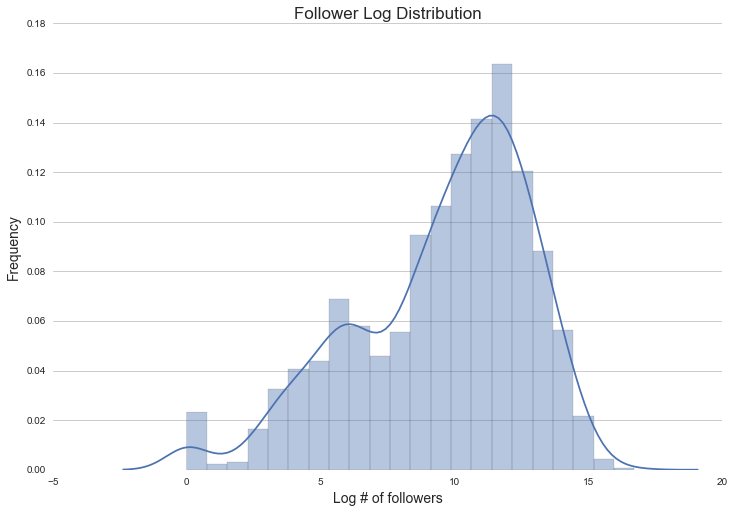

In [13]:
plt.figure(figsize = (12,8))
sns.distplot(eda_frame['log_followers']);
plt.title('Follower Log Distribution', size = 17)
plt.xlabel("Log # of followers", size = 14);
plt.ylabel("Frequency", size = 14)
sns.despine(bottom=True, left=True)
plt.grid(axis = 'x', color ='white', linestyle='-')
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);

## Exploring relationship between artist/song popularity and playlist popularity:

This is a very unbalanced data set, and thus for much of our EDA we looked only at the **top 25%** of playlists in terms of follower number. The hope here is that this would be more illuminating in highlighting any trends, and would be less bogged down in the high number of playlists that have little to no followers. 

In [14]:
top_quart = eda_frame['followers'].quantile(0.75)
top_frame = eda_frame.loc[eda_frame['followers'] >= top_quart]

top_sorted = top_frame.sort_values(by='log_followers')
log_followers_top = list(top_sorted['log_followers'])
followers_top = list(top_sorted['followers'])
pop_top = list(top_sorted['av_song_pop'])

### Average Song Popularity vs. Log Followers

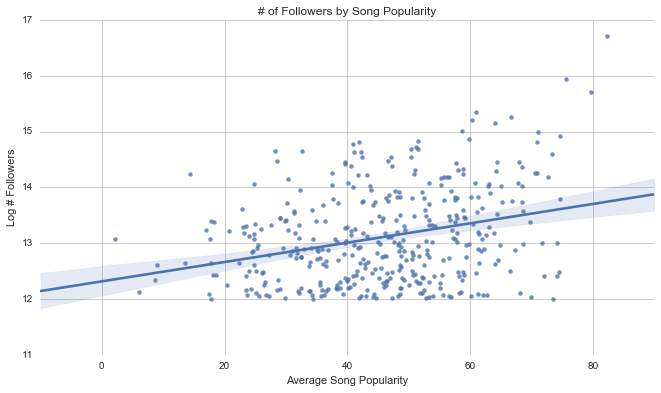

In [15]:
plt.figure(figsize = (11,6))
sns.regplot(np.asarray(pop_top), np.asarray(log_followers_top), marker = 'o', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Average Song Popularity");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Song Popularity")
plt.show()

### % Popular Artists in a Playlist vs. Log Followers

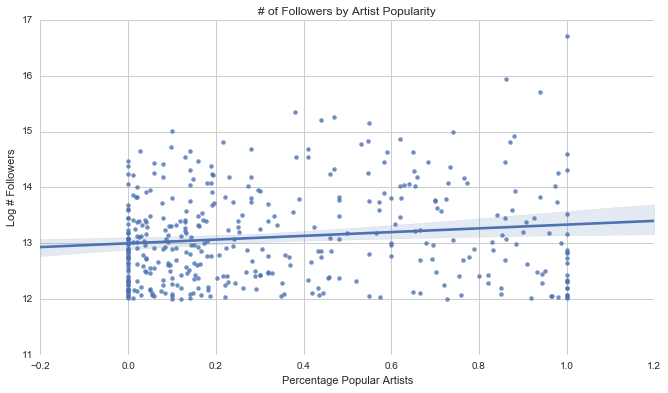

In [16]:
plt.figure(figsize = (11,6))
sns.regplot(top_sorted['popular_artist_pct'], np.asarray(log_followers_top), marker = 'o', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Percentage Popular Artists");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Artist Popularity")
plt.show()

### Average Artist Popularity vs. Log Followers

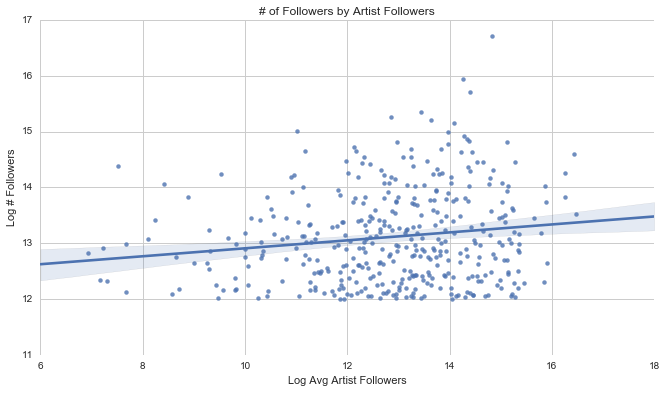

In [17]:
plt.figure(figsize = (11,6))
sns.regplot(top_sorted['log_artist_follow'], np.asarray(log_followers_top), marker = 'o', color = 'b')
sns.despine(bottom=True, left=True)
plt.xlabel("Log Avg Artist Followers");
plt.ylabel("Log # Followers")
plt.title("# of Followers by Artist Followers")
plt.show()

We wanted to explore one of the most logical relationships, the tie between individual song or artist popularity and playlist popularity. Above we see the relationship between average song popularity (the average of the score 1-100 across all songs in the playlist) and number of playlist followers, as well as the average artist popularity and number of followers, for the top 25% of playlists. For both plots, we see a slight positive correlation between average song popularity and playlist success. 

## Exploring Genre Diversity in Playlists

We thought it would be interesting to see if playlists that are uniform in genre, which we defined as being at least **80% composed of a single genre** of music, were more or less popular than genres which seemingly lacked a theme, and were composed of more of a hodgepodge of songs with varying genres.

In [18]:
eda_frame['1genre'] = np.where((eda_frame['pop_pct']>=.8)|(eda_frame['rap_pct']>=.8)|(eda_frame['rock_pct']>=.8), 1, 0)
mixed_genre = eda_frame.loc[eda_frame['1genre'] == 0]
one_genre = eda_frame.loc[eda_frame['1genre'] == 1]

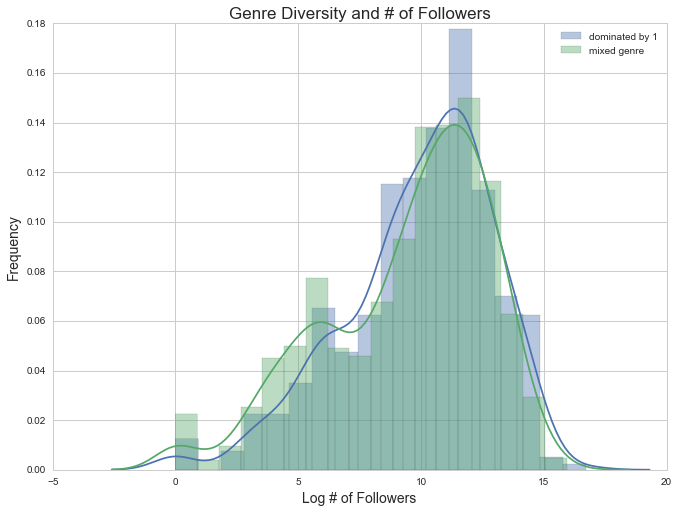

In [19]:
plt.figure(figsize = (11,8))
sns.distplot(one_genre['log_followers'], label='dominated by 1')
sns.distplot(mixed_genre['log_followers'], label='mixed genre')
plt.legend(loc='upper right')
plt.title('Genre Diversity and # of Followers', size = 17)
plt.ylabel('Frequency', size = 14)
plt.xlabel('Log # of Followers', size = 14)
plt.show()

Above we see that there are a lot more playlists with mixed genre, though the spreads of the two look roughly the same. Thus, on average there seems to be no advantage to either a playlist composed entirely of one genre, or consisting of many genres. 

## Heatmap of our Variables

In [20]:
eda_train = eda_frame.drop(['playlist','name','followers'], axis = 1)
train_corr_matrix = pd.DataFrame(np.corrcoef(eda_train.T))
train_corr_matrix.columns = eda_train.columns
train_corr_matrix.index = eda_train.columns

We decided to use a heatmap in order to show how some of our variables were correlated with one another. This heatmap measures correlation between our predictors and our response (log followers), with a positive (red) correlation indicating that there is a direct relationship, and a negative (blue) correlation indicating that there is an inverse relationship.

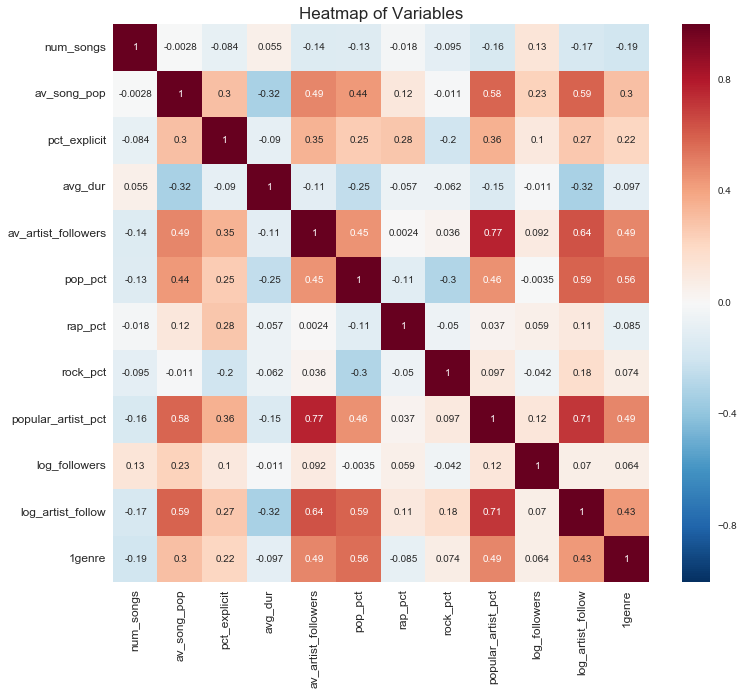

In [21]:
plt.figure(figsize = (12,10))
sns.heatmap(train_corr_matrix,annot=True)
plt.title('Heatmap of Variables', size = 17)
plt.xticks(rotation=90, size = 12) 
plt.yticks(rotation=0, size = 12) 
plt.show()

Many of the results below show up as expected. Some are obvious, for instance:
- Average artist followers directly correlates highly with proportion of popular artists in the playlist
- Average song popularity directly correlates well with proportion of pop songs in the playlist

But we also see things that are not immediately as intuitive:
- There is negative correlation between the average duration of songs in a playlist and average song popularity
- There is some positive correlation between the proportion of explicit songs in the playlist and the proportion of pop and rap songs, while there is a weak negative correlation for proportion of rock songs.

With regards to our response variable, we see that the strongest relationships that log(followers) has is with **Average Song Popularity** and **Number of songs**. However these correlations are fairly weak, as one would expect, because there is such a large amount of variation in creating a successful/highly followed playlist.

*Note*: For the sake of simplicity, we only included 3 genre variables, though later in our analysis we end up using more to describe the different genres that playlists have.

In [22]:
# Adding a column that will help us count occurrences
df['count'] = 1

## Exploring What is Featured Most Often in Playlists

We wanted to look at most popular tracks, artists, and genres represented across playlists to get a sense of the distribution (i.e. is it fairly evenly spread or dominated by a small minority), and of any outliers that may be particularly indicative of a successful playlist.

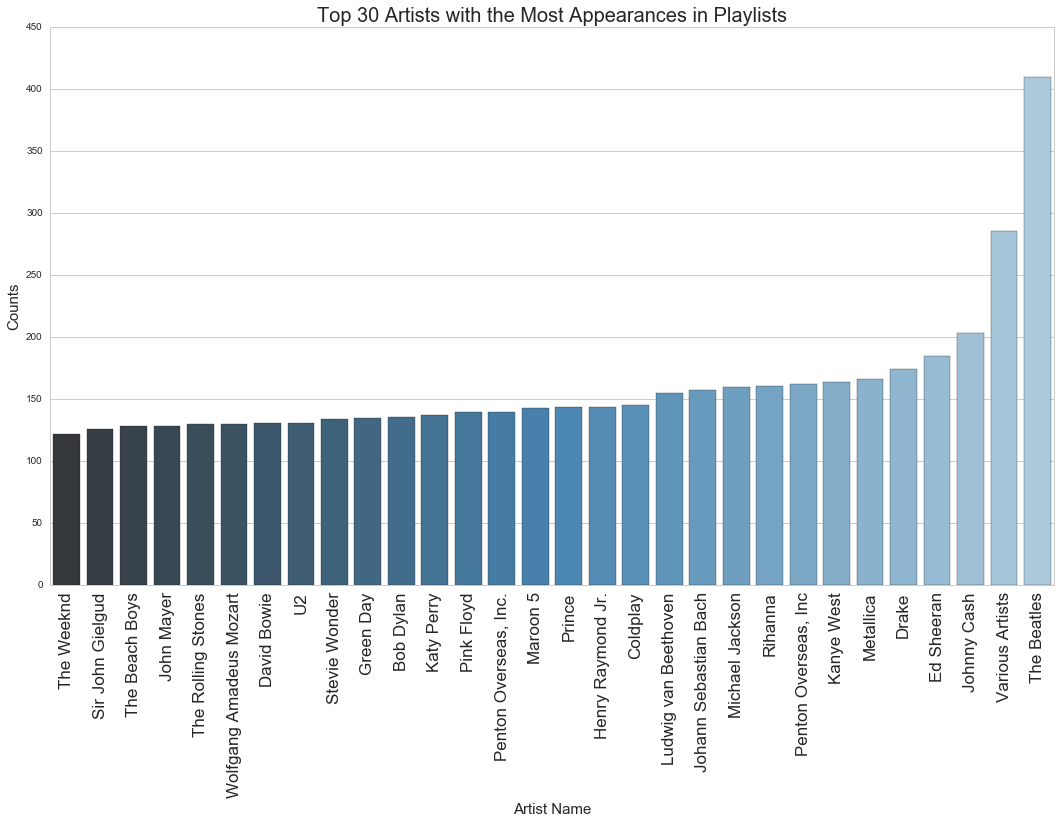

In [23]:
artist_counts = df.groupby('artist_name', as_index=False)['count'].count().sort_values('count', ascending=False)
artist_counts = artist_counts.head(30)
artist_counts = artist_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(artist_counts['artist_name'], artist_counts['count'], palette="Blues_d")
plt.xticks(rotation=90, size = 17)
plt.title('Top 30 Artists with the Most Appearances in Playlists', size = 20)
plt.xlabel('Artist Name', size = 15)
plt.ylabel('Counts', size = 15)
plt.show()

Here, the important trend is that the most popular artists fall into one of three categories. First, there are oldie artists that are timeless and thus remain popular even today (eg. The Beatles, Stevie Wonder, and Michael Jackson). Second, we have trendy artists that are hip with the times (eg. Drake, Rihanna, and Ed Sheeran). Third, there are random artists that don't seem immediately obvious or gibberish (eg. Penton Overseas, Sir John Gielgud, etc.). 

Also important to note is the Spotify generated error that Penton Overseas, Inc. is double recorded here, both with and without a period at the end of the string. We don't expext this to be the case with other artists because of Spotify committing to making searches easy and trademark/ lisencing problems.

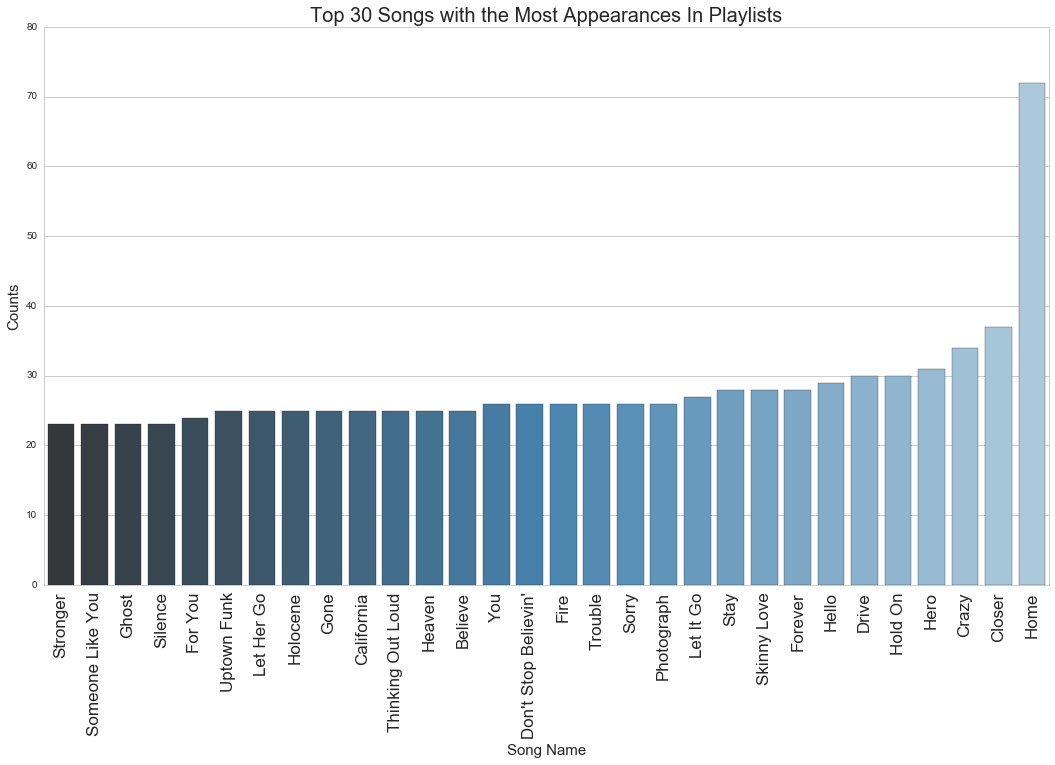

In [24]:
song_counts = df.groupby('song_name', as_index=False)['count'].count().sort_values('count', ascending=False)
song_counts = song_counts.head(30)
song_counts = song_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(song_counts['song_name'], song_counts['count'], palette="Blues_d")
plt.xticks(rotation=90, size = 17) 
plt.title('Top 30 Songs with the Most Appearances In Playlists', size = 20)
plt.xlabel('Song Name', size = 15)
plt.ylabel('Counts', size = 15)
plt.show()

Some interesting things to note here:
- It's hard to distinguish whether these songs refer to a single song by an artist or multiple, since some, like "Home" or "Crazy" are common song titles. It's easier to know what songs are most common with longer, more specific names like "Skinny Love" or "Don't Stop Believin'". 
- Based on the songs we're seeing, it seems like the songs that are most prevalent in playlists tend to be non-explicit and a majority pop/indie.

In [25]:
# Taking the top 150 most followed playlists to get genre specific data
top150playlists = eda_frame.sort_values("followers", ascending=False).head(150)['playlist'].values
df150 = df[df['playlist_id'].isin(top150playlists)]
df150 = df150.reset_index()

# Get rid of the brackets at the ends of the genre strings
for i in range(len(df150['artist_genres'])):
    df150['artist_genres'][i] = df150['artist_genres'][i][1:-1]

In [26]:
# Cleaning the genre strings some more
genrearray = df150['artist_genres']
genreitem = genrearray[0].replace(" '", "")
genreitem = genreitem.replace("'", "")
genreitem.split(',')

['dance pop', 'pop', 'post-teen pop']

In [27]:
# More cleaning
genreslist = []
for i in genrearray:
    genreitem = i.replace(" '", "")
    genreitem = genreitem.replace("'", "")
    genreslist.append(genreitem.split(','))

In [28]:
# Creating a df for the genres
genredf = pd.DataFrame(genreslist)
genredfstack = pd.DataFrame(genredf.stack())
genredfstack['count'] = 1
genredfstack.replace('', np.nan, inplace=True)
genredfstack.dropna(inplace=True)

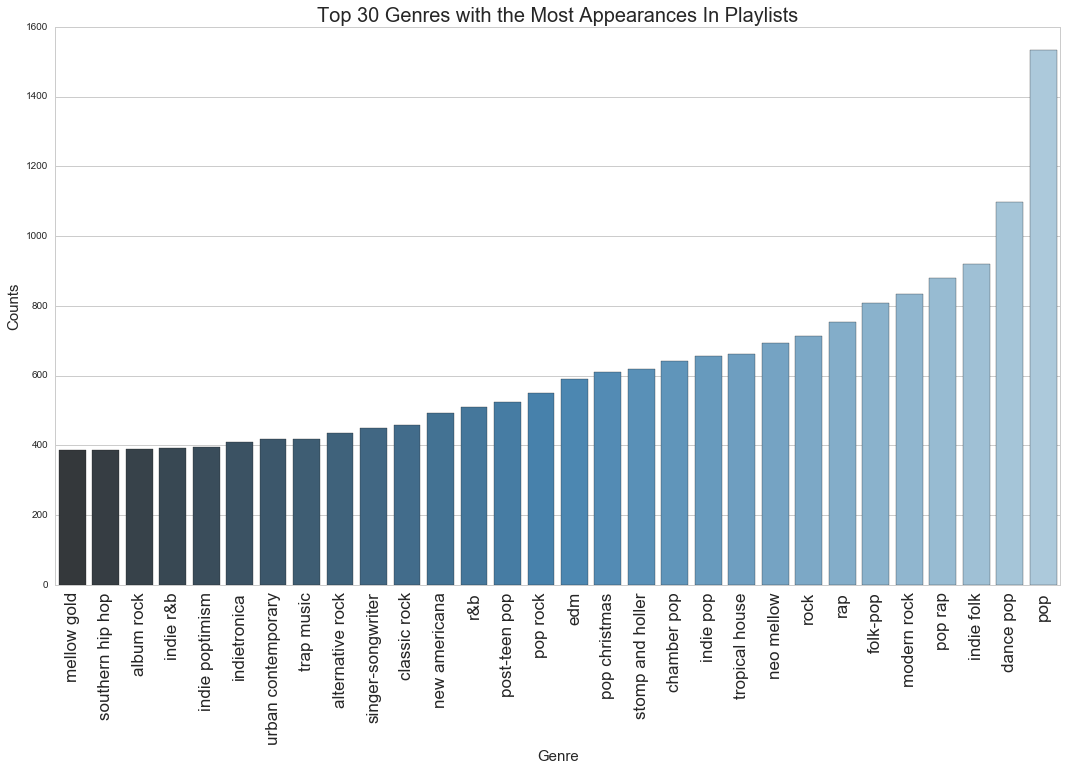

In [29]:
# Plotting the top 30 most prevalent genres in the top 150 playlists
genre_counts = genredfstack.groupby(0, as_index=False)['count'].count().sort_values('count', ascending=False)
genre_counts = genre_counts.head(30)
genre_counts = genre_counts.sort_values('count')

plt.figure(figsize = (18,10))
sns.barplot(genre_counts[0], genre_counts['count'], palette="Blues_d")
plt.xticks(rotation=90, size = 17) 
plt.title('Top 30 Genres with the Most Appearances In Playlists', size = 20)
plt.xlabel('Genre', size = 15)
plt.ylabel('Counts', size = 15)
plt.show()

Here, we see that many of the most popular genres include, edm (electronic), pop, and rap music. This makes sense given current popular music tastes in the US. Additionally, we see above that the different between, for example, post-teen pop and pop is likely pretty insignificant. Thus, since songs do not fit neatly into genres, this predictor may be a little bit shaky. There is significant overlap in terms of genre (especially since we are thinking about the artis's genre as being definitive of the song genre, though that may not necessarily be the case. For exampe, Taylor Swift is classified now as pop even though her original music was country).

The bottom line observation here is that data returned from the Spotify API is messy, which is likely to factor heavily into the effectiveness of our model. This is something that we will have to take into consideration when taking future steps.

### Looking at Genre-Specific Playlists and Followers

In the following graphs, we looked at the following 11 genres: Pop, Rock, Rap, Hip-Hop, Country, Metal, Indie Folk, R&B, EDM (Electronic Dance Music), Classical, and Jazz. Additionally, we looked at playlists that were made up mostly of artists that were deemed popular (as having a popularity score over 75). We defined genre-specific playlists (or popular artist-specific playlists) as those that had more than 70% of a single genre or more than 70% of popular artists. We use an indicator of 1 here to signify when playlists fall into this category; otherwise they are assigned a 0. We compare the distribution of followers between these two, for all 12 categories.

In [85]:
fullgenredf = pd.read_csv('PlaylistInfo12-6.csv')
fullgenredf['logfollowers'] = np.log(fullgenredf['followers'])
fullgenredf = fullgenredf.replace([np.inf, -np.inf], 0)

In [86]:
fullgenredf['pop_or_not'] = np.where((fullgenredf['pop_pct']>=.7), 1, 0)
fullgenredf['rock_or_not'] = np.where((fullgenredf['rock_pct']>=.7), 1, 0)
fullgenredf['rap_or_not'] = np.where((fullgenredf['rap_pct']>=.7), 1, 0)
fullgenredf['hiphop_or_not'] = np.where((fullgenredf['hip_hop_pct']>=.7), 1, 0)
fullgenredf['country_or_not'] = np.where((fullgenredf['country_pct']>=.7), 1, 0)
fullgenredf['metal_or_not'] = np.where((fullgenredf['metal_pct']>=.7), 1, 0)
fullgenredf['indiefolk_or_not'] = np.where((fullgenredf['indie_folk_pct']>=.7), 1, 0)
fullgenredf['rnb_or_not'] = np.where((fullgenredf['rnb_pct']>=.7), 1, 0)
fullgenredf['edm_or_not'] = np.where((fullgenredf['edm_pct']>=.7), 1, 0)
fullgenredf['classical_or_not'] = np.where((fullgenredf['classical_pct']>=.7), 1, 0)
fullgenredf['jazz_or_not'] = np.where((fullgenredf['jazz_pct']>=.7), 1, 0)
fullgenredf['popular_or_not'] = np.where((fullgenredf['popular_artist_pct']>=.7), 1, 0)

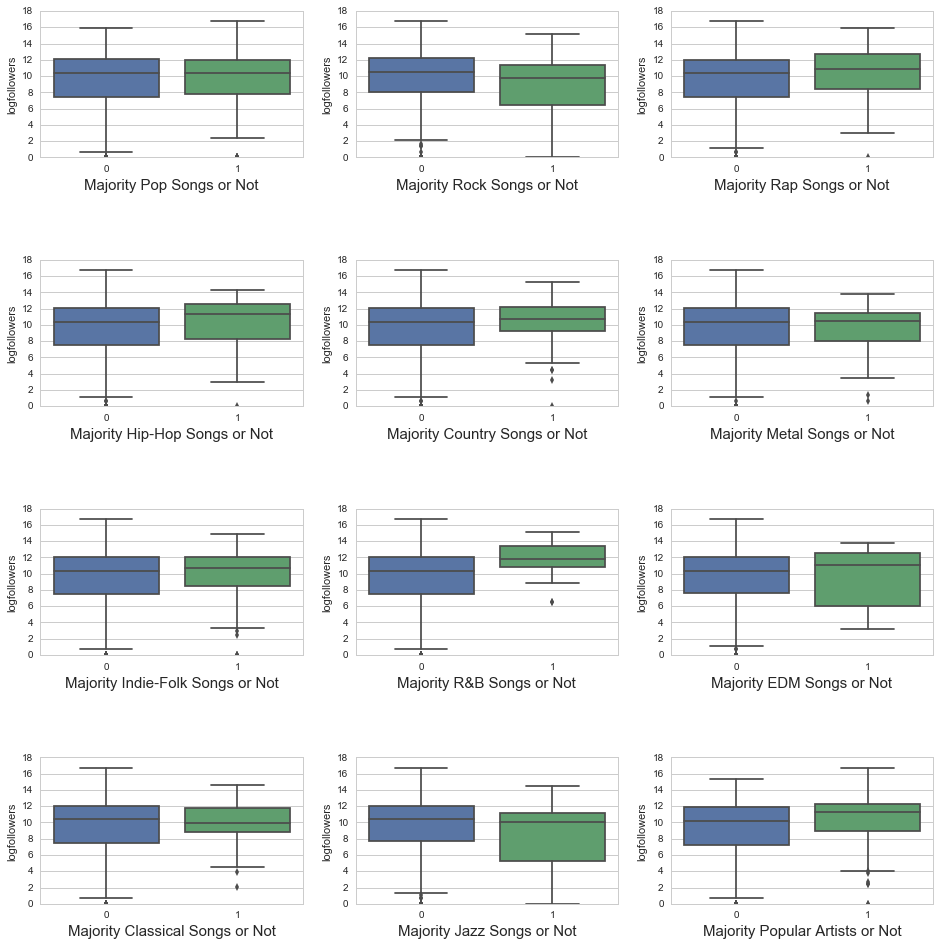

In [87]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(ncols=3,nrows=4,figsize=(16,16))
fig.subplots_adjust(hspace=.7)
sns.boxplot(x = fullgenredf['pop_or_not'], y = fullgenredf['logfollowers'], ax = ax1).set_xlabel('Majority Pop Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['rock_or_not'], y = fullgenredf['logfollowers'], ax = ax2).set_xlabel('Majority Rock Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['rap_or_not'], y = fullgenredf['logfollowers'], ax = ax3).set_xlabel('Majority Rap Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['hiphop_or_not'], y = fullgenredf['logfollowers'], ax = ax4).set_xlabel('Majority Hip-Hop Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['country_or_not'], y = fullgenredf['logfollowers'], ax = ax5).set_xlabel('Majority Country Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['metal_or_not'], y = fullgenredf['logfollowers'], ax = ax6).set_xlabel('Majority Metal Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['indiefolk_or_not'], y = fullgenredf['logfollowers'], ax = ax7).set_xlabel('Majority Indie-Folk Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['rnb_or_not'], y = fullgenredf['logfollowers'], ax = ax8).set_xlabel('Majority R&B Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['edm_or_not'], y = fullgenredf['logfollowers'], ax = ax9).set_xlabel('Majority EDM Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['classical_or_not'], y = fullgenredf['logfollowers'], ax = ax10).set_xlabel('Majority Classical Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['jazz_or_not'], y = fullgenredf['logfollowers'], ax = ax11).set_xlabel('Majority Jazz Songs or Not', size = 15)
sns.boxplot(x = fullgenredf['popular_or_not'], y = fullgenredf['logfollowers'], ax = ax12).set_xlabel('Majority Popular Artists or Not', size = 15)
plt.show()

For the most part, we see a smaller spread in the playlists that are genre or popular-specific and those that aren't. One thing to note would be that for almost all 12 categories, the variation in the specific playlists is smaller, which is likely due to there being fewer observations. The most interesting things we see from these graphs is that:
- R&B-specific playlists seem to have significantly more followers; in addition, their spread is much smaller.
- Popular Artist-specific playlists also seem to have more followers on average, though their spread seems to be fairly equal for non pop. artist playlists.
- Rap and Hip-Hop-specific playlists have distributions that may suggest that overall these playlists have slightly more followers than the average non-Rap or Hip-Hop-specific playlist.